In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
def get_operator_from_y(y, dim1B, dim2B):  
  # reshape the solution vector into 0B, 1B, 2B pieces
  #print(y)
  ptr = 0
  zero_body = y[ptr]

  ptr += 1
  #print(y[ptr:ptr+dim1B*dim1B])
  one_body = np.reshape(y[ptr:ptr+dim1B*dim1B], (dim1B, dim1B))

  ptr += dim1B*dim1B
  two_body = np.reshape(y[ptr:ptr+dim2B*dim2B], (dim2B, dim2B))

  return zero_body,one_body,two_body

Plot calculating $|H_{true}(s)-H_{ROM}(s)|$

In [3]:
inPath = "/mnt/c/Users/aryan/Documents/MSU_FRIB/IMSRG/proper_orth_decomp/"
Hfile = 0
Hopinf_file = 0
Hgalerkin_file = 0

with open(inPath+"allHs.pkl", 'rb') as fp:
    Hfile = pickle.load(fp)

with open(inPath+"allH_opinf.pkl", 'rb') as fp:
    Hopinf_file = pickle.load(fp)

with open(inPath+"allH_galerkin.pkl", 'rb') as fp:
    Hgalerkin_file = pickle.load(fp)

In [4]:
diffList_opinf = []
diffList_galerkin = []
for i, H in enumerate(Hfile):
    true_E, true_f, true_Gamma = get_operator_from_y(H, 8, 64)
    E_opinf, f_opinf, Gamma_opinf = get_operator_from_y(Hopinf_file[i], 8, 64)
    E_g, f_g, Gamma_g = get_operator_from_y(Hgalerkin_file[i], 8, 64)
    norm = true_E+np.linalg.norm(true_f, ord="fro")+np.linalg.norm(true_Gamma, ord="fro")
    opinf_diff = true_E-E_opinf+np.linalg.norm(true_f-f_opinf, ord="fro")+np.linalg.norm(true_Gamma-Gamma_opinf, ord="fro")
    galerkin_diff = true_E-E_g+np.linalg.norm(true_f-f_g, ord="fro")+np.linalg.norm(true_Gamma-Gamma_g, ord="fro")
    diffList_opinf.append(opinf_diff/norm)
    diffList_galerkin.append(galerkin_diff/norm)

Text(0.5, 1.0, 'ImTime Generator')

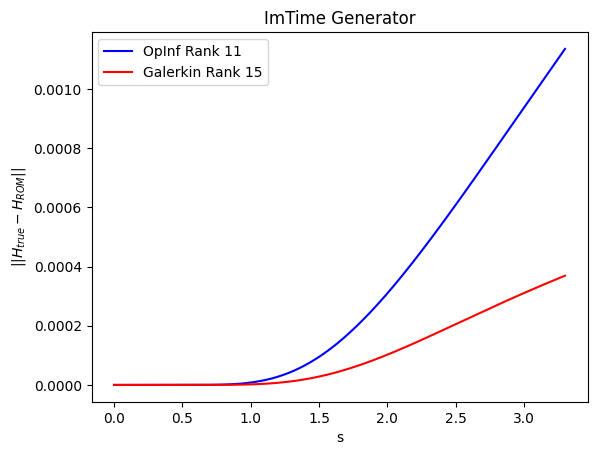

In [5]:
sList = np.linspace(0.,3.3, 330)
plt.plot(sList, diffList_opinf, label="OpInf Rank 11", color="blue")
plt.plot(sList, diffList_galerkin, label="Galerkin Rank 15", color="red")
plt.xlabel(r's')
plt.ylabel(r'$||H_{true}-H_{ROM}||$')
plt.legend()
plt.title("ImTime Generator")